Credits: Raschka, chap. 12

## PyTorch Pre-flight

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
from IPython.display import Image as IPythonImage
%matplotlib inline

### Performance challenges

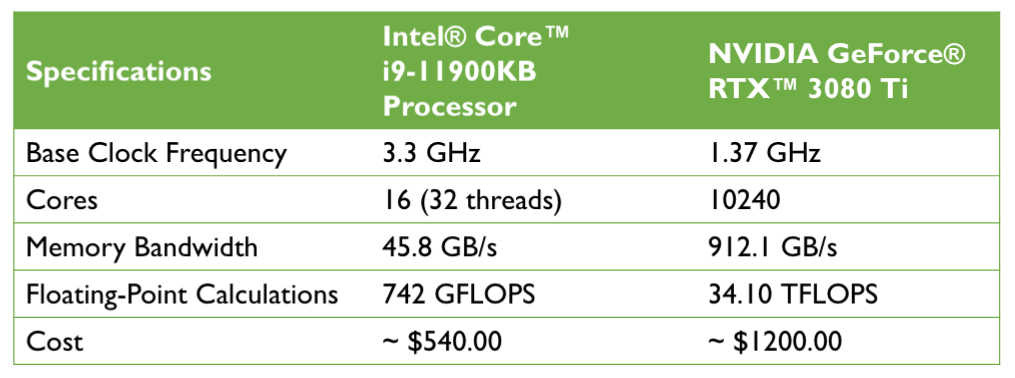

In [ ]:
IPythonImage(filename='figures/12_01.png', width=500)

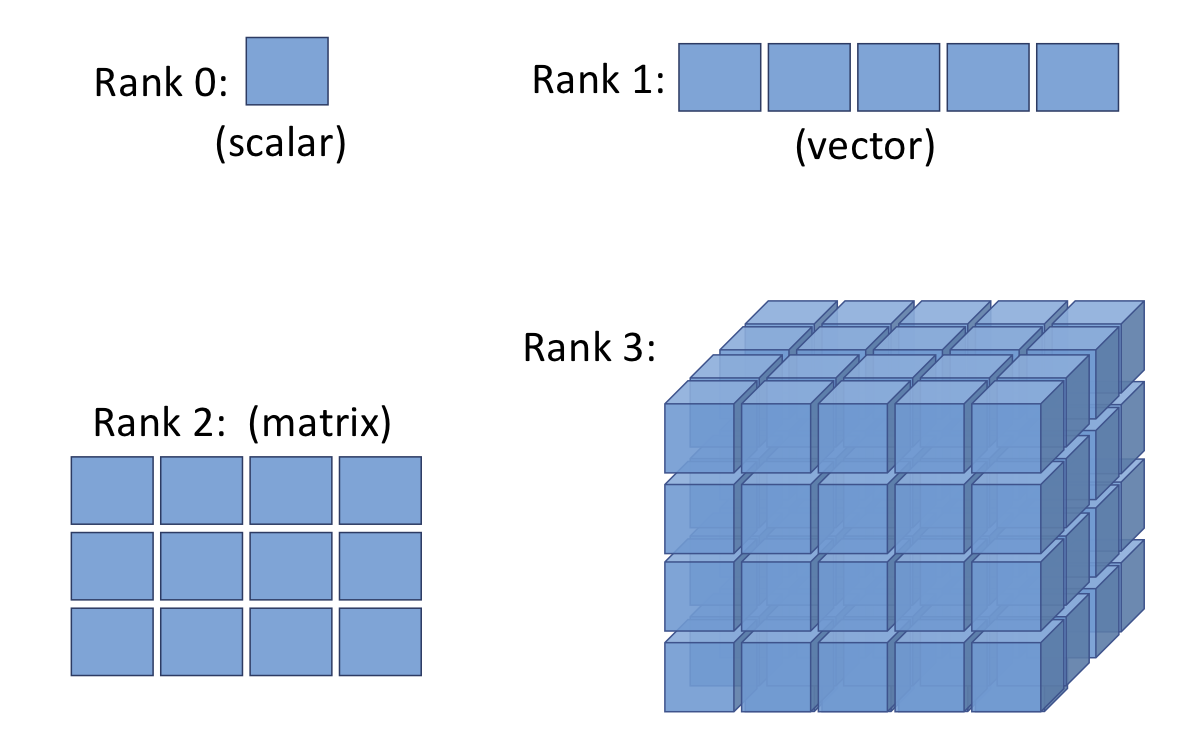

In [ ]:
IPythonImage(filename='figures/12_02.png', width=500)

### First steps with PyTorch

### Installing PyTorch

In [2]:
%pip install torch

In [2]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3) # sets the precision of the printed numbers to three decimal places


PyTorch version: 2.4.1+cu121


In [3]:
# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available, using CPU.")


GPU not available, using CPU.


In [5]:
! python -c 'import torch; print(torch.__version__)'

2.4.1+cu121


### Creating tensors in PyTorch

In [4]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [ ]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [ ]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [ ]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.7757, 0.8721, 0.0653],
        [0.3834, 0.7023, 0.5269]])


### Manipulating the data type and shape of a tensor

In [ ]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


In [ ]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 1, 0)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [ ]:
print(t)
print(t_tr)

tensor([[0.6410, 0.1115, 0.8881, 0.6447, 0.7698],
        [0.8651, 0.5794, 0.5739, 0.7982, 0.4404],
        [0.4984, 0.3944, 0.1634, 0.2508, 0.7270]])
tensor([[0.6410, 0.8651, 0.4984],
        [0.1115, 0.5794, 0.3944],
        [0.8881, 0.5739, 0.1634],
        [0.6447, 0.7982, 0.2508],
        [0.7698, 0.4404, 0.7270]])


In [ ]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


In [ ]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

print(t)

print(t_sqz)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])
tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])
tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])


### Applying mathematical operations to tensors

In [ ]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [ ]:
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [ ]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [ ]:
t4 = torch.mean(t3, axis=0)
print(t4)

tensor([ 0.3491, -0.0436])


In [ ]:
t4_b = torch.mean(t3, axis=1)
print(t4_b, t4_b.shape)

tensor([ 0.0656, -0.2655,  0.5699,  0.4338, -0.0402]) torch.Size([5])


In [ ]:
print(t1.shape, t2.shape)

torch.Size([5, 2]) torch.Size([5, 2])


In [ ]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [ ]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [ ]:
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [ ]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)


tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [ ]:
np.sqrt(t1[0][0]**2+t1[0][1]**2)

tensor(0.6785)

In [ ]:
# to verify the above calculated the norm, we can do
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### Split, stack, and concatenate tensors

In [ ]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [ ]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [ ]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [ ]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)
print(S.shape)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
torch.Size([3, 2])


### Building input pipelines in PyTorch

### Creating a PyTorch DataLoader from existing tensors

In [7]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
print(t.shape)
data_loader = DataLoader(t)

torch.Size([6])


In [8]:
for item in data_loader:
    print(item, item.shape)

tensor([0.]) torch.Size([1])
tensor([1.]) torch.Size([1])
tensor([2.]) torch.Size([1])
tensor([3.]) torch.Size([1])
tensor([4.]) torch.Size([1])
tensor([5.]) torch.Size([1])


In [9]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset

In [10]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [11]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
#joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


### Shuffle, batch, and repeat

In [12]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


### Creating a dataset from files on your local storage disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pathlib

imgdir_path = pathlib.Path('/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


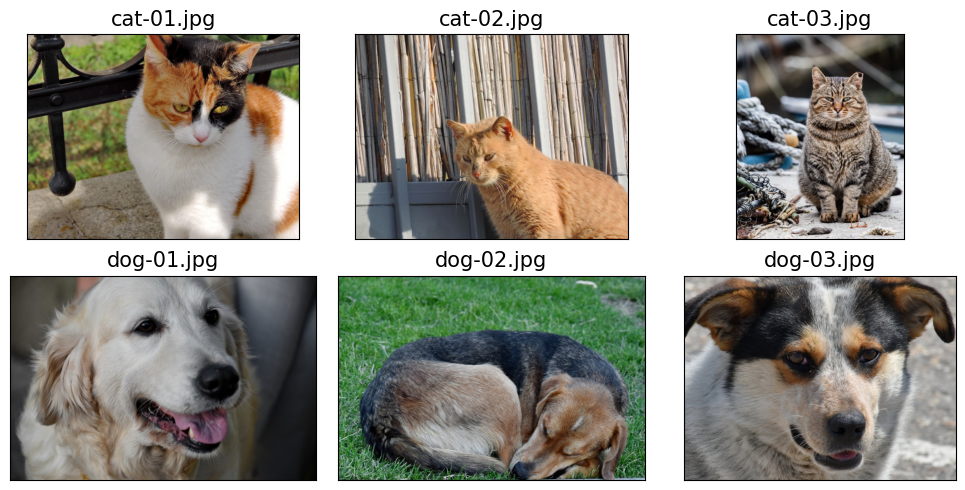

In [16]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

In [17]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [18]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images/cat-01.jpg 0
/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images/cat-02.jpg 0
/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images/cat-03.jpg 0
/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images/dog-01.jpg 1
/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images/dog-02.jpg 1
/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images/dog-03.jpg 1


In [31]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        print(type(img))
        return img, label
    def __len__(self):
        return len(self.labels)

# let's resize to, e.g., 80x120

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

image_dataset = ImageDataset(file_list, labels, transform)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


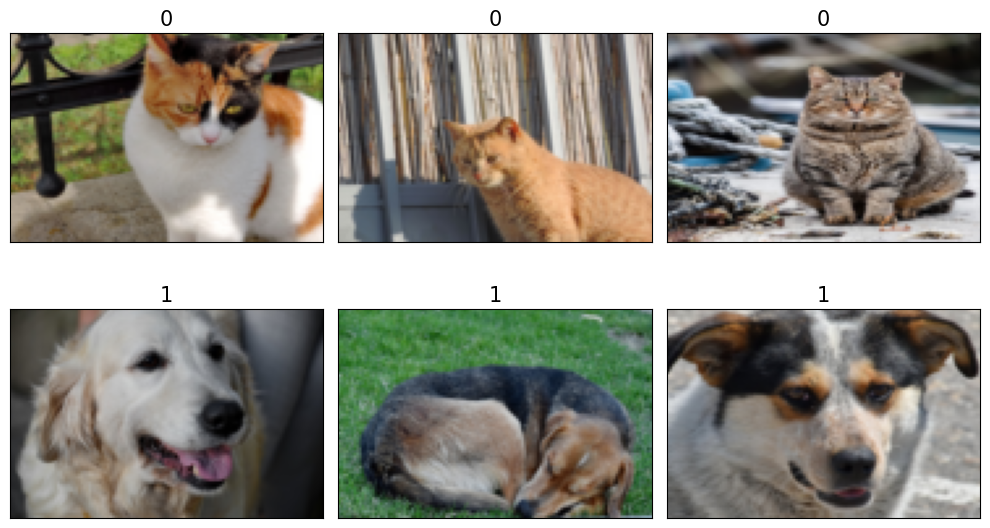

In [32]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])

    #imshow expect a numpy as argument
    #The original shape (C, H, W) is transformed to (H, W, C)
    # imshow expectes the channel dimension to be the last axis.

    ax.imshow(example[0].numpy().transpose((1, 2,0)))

    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
#plt.savefig('figures/12_04.pdf')
plt.show()